<a href="https://colab.research.google.com/github/Vincelogs/Vince/blob/master/vincetask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/My Drive/Datasets"

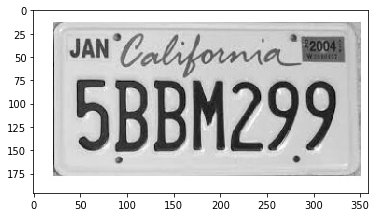

In [11]:
CATEGORIES = ["plate_number", "negative_image"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break  

In [12]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [13]:
print(img_array.shape)

(196, 359)


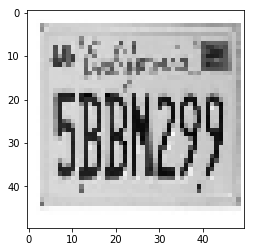

In [14]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:


010
10100.

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

print(len(training_data))

100%|██████████| 50/50 [00:23<00:00,  1.70it/s]

100


In [0]:
import random

random.shuffle(training_data)

In [18]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [  3]
   ...
   [  1]
   [  1]
   [255]]

  [[255]
   [255]
   [  6]
   ...
   [  3]
   [  3]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [254]
   [254]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 70 samples, validate on 30 samples
Epoch 1/10
70/70 [==============================] - 4s 53ms/sample - loss: 1.0497 - acc: 0.5143 - val_loss: 1.8717 - val_acc: 0.4000
Epoch 2/10
70/70 [==============================] - 3s 43ms/sample - loss: 1.0161 - acc: 0.5714 - val_loss: 0.5261 - val_acc: 0.8667
Epoch 3/10
70/70 [==============================] - 3s 42ms/sample - loss: 0.5118 - acc: 0.8857 - val_loss: 0.6205 - val_acc: 0.3667
Epoch 4/10
70/70 [==============================] - 3s 42ms/sample - loss: 0.5460 - acc: 0.5286 - val_loss: 0.3715 - val_acc: 0.8667
Epoch 5/10
70/70 [==============================] - 3s 43ms/sample - loss: 0.3675 - acc: 0.9143 - val_loss: 0.2795 - val_acc: 0.9333
Epoch 6/10
70/70 [==============================] - 3s 43ms/sample - loss: 0.29